<a href="https://colab.research.google.com/github/Hanjateacherson/SMHRD/blob/main/python/03_01pandas_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# 1. exam 데이터 불러오기
exam = pd.read_csv('/content/drive/MyDrive/data/exam.csv')
exam

,id,nclass,math,english,science
0,1,1,52,98,50
1,2,1,60,97,58
2,3,1,44,86,78
3,4,1,35,98,58
4,5,1,27,80,65
...,...,...,...,...,...
95,96,5,58,98,65
96,97,5,65,68,98
97,98,5,80,78,90
98,99,5,89,68,87


In [3]:
# 2. exam 데이터의 정보 확인해보기
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       100 non-null    int64
 1   nclass   100 non-null    int64
 2   math     100 non-null    int64
 3   english  100 non-null    int64
 4   science  100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [4]:
# 3. exam 데이터의 요약보기
exam.describe(include='all')

,id,nclass,math,english,science
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.000000,59.070000,83.460000,65.310000
std,29.011492,1.421338,19.748037,12.746495,20.917198
min,1.000000,1.000000,20.000000,45.000000,12.000000
25%,25.750000,2.000000,46.000000,78.000000,53.500000
50%,50.500000,3.000000,56.500000,85.500000,65.000000
75%,75.250000,4.000000,78.000000,97.000000,78.000000
max,100.000000,5.000000,100.000000,100.000000,100.000000


In [5]:
#4. exam데이터의 각 평균값 구하기
#4.1 수학값 가져고 오기
exam['math']
#4.2 영어값 가지고 오기
exam['english']
#4.3  과학값 가지고 오기
exam['science']

0     50
1     58
2     78
3     58
4     65
      ..
95    65
96    98
97    90
98    87
99    58
Name: science, Length: 100, dtype: int64

In [6]:
exam_mean = (exam['math']+exam['english']+exam['science'])/3
exam_mean

0     66.666667
1     71.666667
2     69.333333
3     63.666667
4     57.333333
        ...    
95    73.666667
96    77.000000
97    82.666667
98    81.333333
99    73.000000
Length: 100, dtype: float64

In [7]:
#5. 평균 컬럼 파생변수 만들기
exam['avg'] = exam_mean
exam

,id,nclass,math,english,science,avg
0,1,1,52,98,50,66.666667
1,2,1,60,97,58,71.666667
2,3,1,44,86,78,69.333333
3,4,1,35,98,58,63.666667
4,5,1,27,80,65,57.333333
...,...,...,...,...,...,...
95,96,5,58,98,65,73.666667
96,97,5,65,68,98,77.000000
97,98,5,80,78,90,82.666667
98,99,5,89,68,87,81.333333


In [8]:
import numpy as np


In [9]:
# 평균점수가 60점 이상인 사람 통과 pass, fail
# pass,  fail의 값도 확인

exam['통과'] = np.where(exam['avg']>60,'pass','fail')
exam

,id,nclass,math,english,science,avg,통과
0,1,1,52,98,50,66.666667,pass
1,2,1,60,97,58,71.666667,pass
2,3,1,44,86,78,69.333333,pass
3,4,1,35,98,58,63.666667,pass
4,5,1,27,80,65,57.333333,fail
...,...,...,...,...,...,...,...
95,96,5,58,98,65,73.666667,pass
96,97,5,65,68,98,77.000000,pass
97,98,5,80,78,90,82.666667,pass
98,99,5,89,68,87,81.333333,pass


In [10]:
# 평균점수가 80이상 1등급 70이상 2등급 60 이상 3등급 나머지 재시

In [11]:
def makeGrade(row):
    grade = row['avg']

    if grade >=80:
      return "1등급"
    elif grade >= 70:
      return "2등급"
    elif grade >= 60:
      return "3등급"
    else:
      return "재시험"

In [12]:
exam['result'] = exam.apply(makeGrade,axis = 1)

In [13]:
exam

,id,nclass,math,english,science,avg,통과,result
0,1,1,52,98,50,66.666667,pass,3등급
1,2,1,60,97,58,71.666667,pass,2등급
2,3,1,44,86,78,69.333333,pass,3등급
3,4,1,35,98,58,63.666667,pass,3등급
4,5,1,27,80,65,57.333333,fail,재시험
...,...,...,...,...,...,...,...,...
95,96,5,58,98,65,73.666667,pass,2등급
96,97,5,65,68,98,77.000000,pass,2등급
97,98,5,80,78,90,82.666667,pass,1등급
98,99,5,89,68,87,81.333333,pass,1등급


In [16]:
exam['result'].value_counts().sort_index()

1등급    12
2등급    41
3등급    34
재시험    13
Name: result, dtype: int64

In [17]:
exam.groupby('nclass').mean(numeric_only=True)

,id,math,english,science,avg
nclass,,,,,
1,10.5,58.00,83.05,62.75,67.933333
2,30.5,59.45,82.15,64.65,68.750000
3,50.5,60.70,80.95,70.05,70.566667
4,70.5,59.75,86.25,69.65,71.883333
5,90.5,57.45,84.90,59.45,67.266667


In [18]:
result = exam.groupby('nclass').mean(numeric_only=True)

In [ ]:
#nclass를 그룹으로 묶고 그룹별 math의평균값을 구하기


In [19]:
exam.groupby('nclass').agg(math_avg= ('math','mean'))

,math_avg
nclass,
1,58.00
2,59.45
3,60.70
4,59.75
5,57.45


In [ ]:
#nclass를 그룹으로 묶고 그룹별 result pass/fail인 사람들의 수를 구하기


In [34]:
examexam = exam.groupby(['nclass','result'],as_index= False).agg(pf = ('result', 'count'))

In [35]:
examexam

,nclass,result,pf
0,1,1등급,2
1,1,2등급,8
2,1,3등급,7
3,1,재시험,3
4,2,1등급,2
5,2,2등급,11
6,2,3등급,4
7,2,재시험,3
8,3,1등급,3
9,3,2등급,7


## (예제) 반별 등급 인원수를 그래프로 그려보세요

<Axes: xlabel='result', ylabel='pf'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.


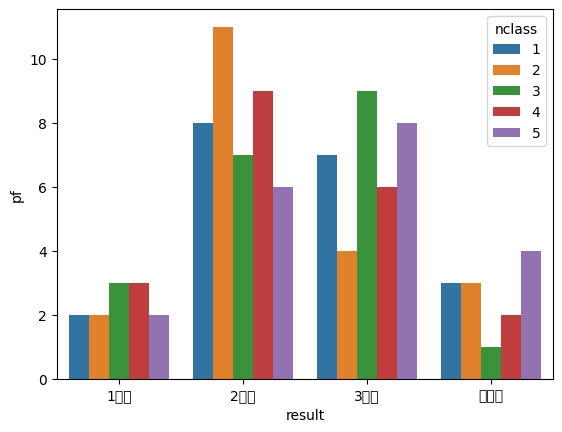

In [39]:
import seaborn as sns
import matplotlib as plt
sns.barplot(data = examexam, x = 'result',y = 'pf',hue = 'nclass')